In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data = pd.read_csv("../../data/data.csv")

In [31]:
data.head()

,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
0,Cà phê Robusta nhân xô,Đắk Lắk,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,5/9/2025 12:00:00 AM,128233.0
1,Cà phê Robusta nhân xô,Đắk Nông,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,5/9/2025 12:00:00 AM,128350.0
2,Cà phê Robusta nhân xô,Gia Lai,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,5/9/2025 12:00:00 AM,128233.0
3,Cà phê Robusta nhân xô,Kon Tum,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,5/9/2025 12:00:00 AM,128200.0
4,Cà phê Robusta nhân xô,Lâm Đồng,Thương lái thu mua,Vnđ/Kg,VNĐ,CTV địa phương,5/9/2025 12:00:00 AM,128000.0


# Kiểm tra dữ liệu thiếu

In [32]:
data.isnull().sum()

Tên_mặt_hàng    0
Thị_trường      0
Loại_giá        0
Đơn_vị_tính     0
Loại_tiền       0
Nguồn           0
Ngày            0
Giá             0
dtype: int64

# Kiểm tra dữ liệu bị trùng

In [33]:
data.duplicated().sum()

np.int64(3)

In [34]:
data[data.duplicated(keep=False)]

,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
5391,Lúa IR 50404 (lúa tươi),An Giang,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,3/12/2025 12:00:00 AM,5600.0
5392,Lúa IR 50404 (lúa tươi),An Giang,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,3/12/2025 12:00:00 AM,5600.0
5406,Lúa IR 50404 (lúa tươi),An Giang,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,3/5/2025 12:00:00 AM,5600.0
5407,Lúa IR 50404 (lúa tươi),An Giang,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,3/5/2025 12:00:00 AM,5600.0
19556,Lúa RVT (lúa tươi),Sóc Trăng,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,9/20/2021 12:00:00 AM,6300.0
19563,Lúa RVT (lúa tươi),Sóc Trăng,Thương lái thu mua,VNĐ/Kg,VNĐ,CTV địa phương,9/20/2021 12:00:00 AM,6300.0


In [35]:
pre_data = data.drop_duplicates()

In [36]:
pre_data.duplicated().sum()

np.int64(0)

# Kiểm tra ngoại lai

In [37]:
q1 = np.quantile(pre_data["Giá"], 0.25)
q3 = np.quantile(pre_data["Giá"], 0.75)
iqr = q3 - q1
min_val = q1 - 1.5 * iqr 
max_val = q3 + 1.5 * iqr

In [38]:
print(min_val, max_val)

-22000.0 61200.0


In [ ]:
pre_data = pre_data[~((pre_data["Giá"] <= min_val) | (pre_data["Giá"] >= max_val) | (pre_data["Giá"] == 0))]

In [52]:
print(pre_data["Giá"].min())
print(pre_data["Giá"].max())

7.0
178883.7334423555


<Axes: ylabel='Giá'>

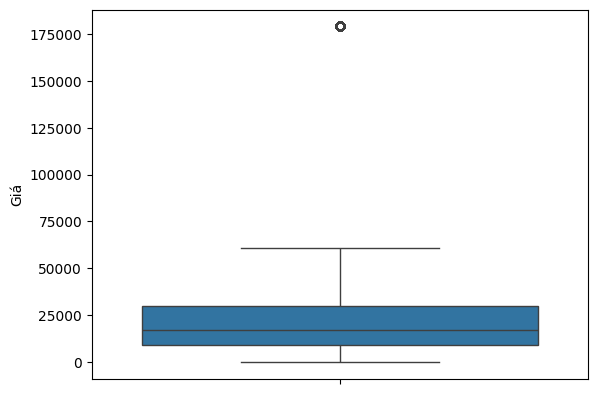

In [53]:
sns.boxplot(pre_data["Giá"])